In [18]:
from matplotlib import font_manager
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset
import pandas as pd


plt.rcParams["font.family"] = "Georgia"

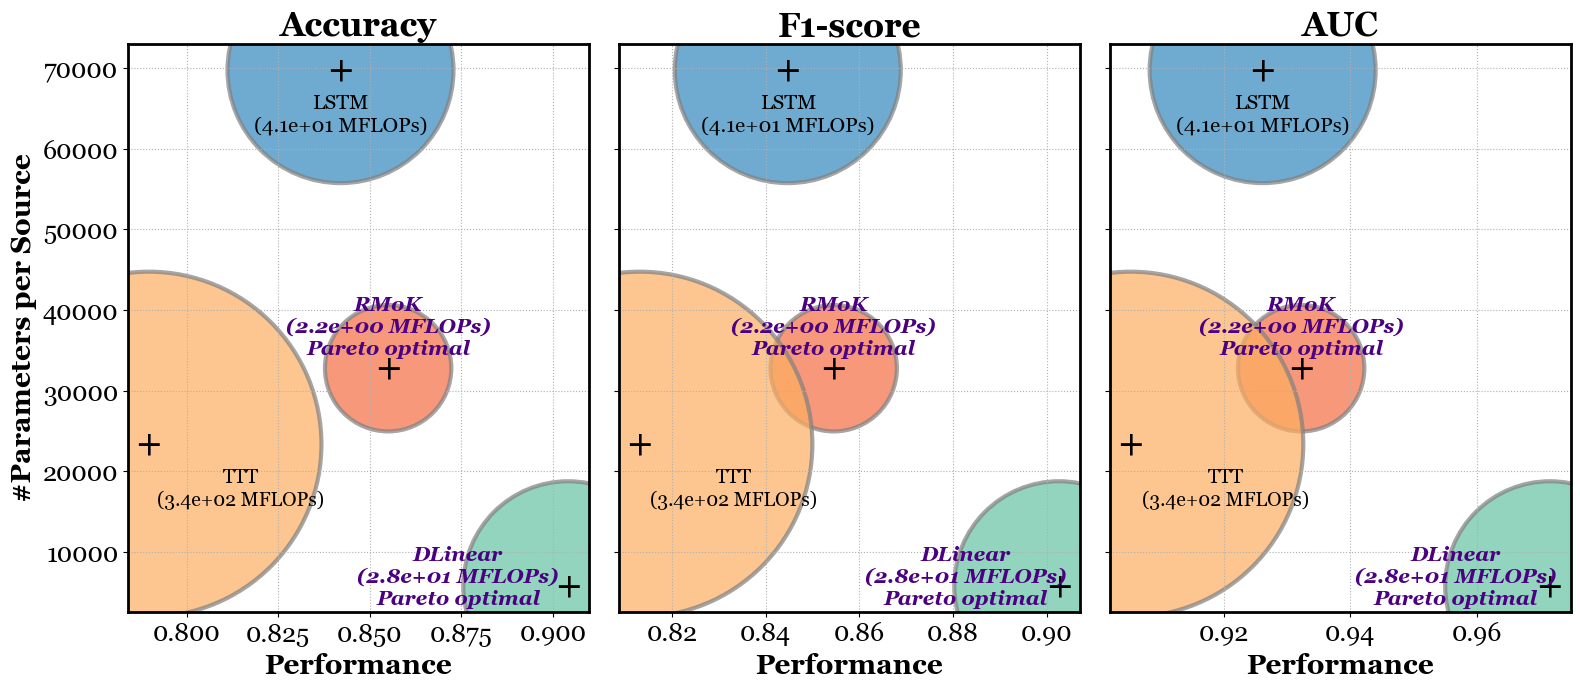

In [19]:
x_list = [
    np.array([0.8420, 0.9041, 0.8550, 0.7897]),  # Accuracy
    np.array([0.8447, 0.9026, 0.8545, 0.8131]),  # F1-score
    np.array([0.9261, 0.9716, 0.9322, 0.9052])   # AUC
]
y = np.array([69756, 5756, 32768, 23332])
flops = np.array([40.906752, 27.930624, 2.23644, 340.060752])  # MFLOPs
y_ = flops**0.4
sizes = y_ * 6000
colors = ['#3288bd', '#66c2a5', '#f46d43', '#fdae61']
names = ["LSTM", "DLinear", "RMoK", "TTT"]
titles = ["Accuracy", "F1-score", "AUC"]

fig, axes = plt.subplots(1, 3, figsize=(16, 7), sharey=True)

for idx, ax in enumerate(axes):
    x = x_list[idx]
    ax.scatter(x, y, s=sizes, edgecolors='grey', linewidth=3, alpha=0.7, c=colors)
    for i in range(len(x)):
        ax.text(x[i], y[i], '+', fontsize=30, ha='center', va='center', color='black')
        if names[i] == "LSTM":
            offset_x = 0 if idx == 0 else (0 if idx == 1 else 0)
            ax.text(x[i] + offset_x, y[i]-3000, f"{names[i]}\n({flops[i]:.1e} MFLOPs)", fontsize=15, ha='center', va='top')
        elif names[i] == "DLinear":
            offset_x = -0.03 if idx == 0 else (-0.02 if idx == 1 else -0.015)
            ax.text(x[i] + offset_x, y[i]+5000, f"{names[i]}\n({flops[i]:.1e} MFLOPs)\nPareto optimal", fontsize=15, ha='center', va='top',
                fontstyle='italic', fontweight='bold', color='#4B0082')
        elif names[i] == "RMoK":
            offset_x = 0 if idx == 0 else (0 if idx == 1 else 0)
            ax.text(x[i] + offset_x, y[i]+9000, f"{names[i]}\n({flops[i]:.1e} MFLOPs)\nPareto optimal", fontsize=15, ha='center', va='top',
                fontstyle='italic', fontweight='bold', color='#4B0082')
        elif names[i] == "TTT":
            offset_x = 0.025 if idx == 0 else (0.02 if idx == 1 else 0.015)
            ax.text(
                x[i] + offset_x, y[i]-3000,
                f"{names[i]}\n({flops[i]:.1e} MFLOPs)",
                fontsize=14, ha='center', va='top'
            )
    ax.set_title(titles[idx], fontsize=24, fontweight='bold')
    ax.tick_params(axis='both', labelsize=18)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_edgecolor('black') 
    ax.grid(True, linestyle=":")

axes[0].set_ylabel("#Parameters per Source", fontsize=20, fontweight='bold')
for ax in axes:
    ax.set_xlabel("Performance", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig("./efficiency.pdf")
plt.show()


In [20]:
data = pd.DataFrame({
    'Accuracy': x_list[0],
    'F1': x_list[1],
    'AUC': x_list[2],
    'Params': y,
    'FLOPs': flops
}, index=names)

sense = ["max", "max", "max", "min", "min"]
pareto_mask = paretoset(data, sense)
pareto_optimal = data[pareto_mask]

print("All models:")
print(data)
print("\nPareto optimal models:")
print(pareto_optimal)
print(f"\nPareto optimal model names: {list(pareto_optimal.index)}")

All models:
         Accuracy      F1     AUC  Params       FLOPs
LSTM       0.8420  0.8447  0.9261   69756   40.906752
DLinear    0.9041  0.9026  0.9716    5756   27.930624
RMoK       0.8550  0.8545  0.9322   32768    2.236440
TTT        0.7897  0.8131  0.9052   23332  340.060752

Pareto optimal models:
         Accuracy      F1     AUC  Params      FLOPs
DLinear    0.9041  0.9026  0.9716    5756  27.930624
RMoK       0.8550  0.8545  0.9322   32768   2.236440

Pareto optimal model names: ['DLinear', 'RMoK']
